In [152]:
import pandas as pd
import numpy as np

##### Time series

In [153]:
pd.Timestamp('27th March 2025 9:39PM')

Timestamp('2025-03-27 21:39:00')

In [154]:
# DatetimeIndex -> df and series index
pd.DatetimeIndex([pd.Timestamp('27th March 2025 9:39PM'),pd.Timestamp('28th March 2025 9:39PM'),pd.Timestamp('29th March 2025 9:39PM')])[0]

Timestamp('2025-03-27 21:39:00')

In [155]:
# date_range()
pd.date_range(start='2025-03-27',end='2nd April 2025',freq='D')

DatetimeIndex(['2025-03-27', '2025-03-28', '2025-03-29', '2025-03-30',
               '2025-03-31', '2025-04-01', '2025-04-02'],
              dtype='datetime64[ns]', freq='D')

In [156]:
# to_datetime()
s = pd.Series(['2025/03/27','2025/3/28','2025/03/29'])
pd.to_datetime(s).dt.day_name()

0    Thursday
1      Friday
2    Saturday
dtype: object

##### Timedelta Object

Represents a duration, the difference between two dates or times.

In [157]:
# create using Timestamp objects
t1 = pd.Timestamp('27th March 2025 21:54:14')
t2 = pd.Timestamp('30th March 2025 11:34:56')
t2 - t1

Timedelta('2 days 13:40:42')

In [158]:
# standalone creation
pd.Timedelta(days=2,hours=13,minutes=40,seconds=42)

Timedelta('2 days 13:40:42')

In [159]:
# Arithmetic Operations
pd.Timestamp('26th March 2025 21:54:14') + pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2025-03-29 08:29:14')

In [160]:
pd.date_range(start='2025-03-26',end='2025-03-31',freq='D') - pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2025-03-23 13:25:00', '2025-03-24 13:25:00',
               '2025-03-25 13:25:00', '2025-03-26 13:25:00',
               '2025-03-27 13:25:00', '2025-03-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')

In [161]:
# real life example
df = pd.read_csv('deliveries.csv')
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [162]:
# Specify the correct date format or infer it automatically
df['order_date'] = pd.to_datetime(df['order_date'], format='%m/%d/%y')
df['delivery_date'] = pd.to_datetime(df['delivery_date'], format='%m/%d/%y')

In [163]:
df['delivery_time_period'] = df['delivery_date'] - df['order_date']
df['delivery_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

##### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [164]:
df=pd.read_csv('google.csv')
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2732,2015-06-26,26.863001,26.888000,26.567499,26.584499,26.584499,42182000
1347,2009-12-23,15.031160,15.264535,15.014970,15.234896,15.234896,83218760
2736,2015-07-02,26.054001,26.232500,26.054001,26.170000,26.170000,24718000
3696,2019-04-26,63.450001,63.653500,63.015999,63.609001,63.609001,24828000
3919,2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
1003,2008-08-13,12.493173,12.541491,12.300893,12.454069,12.454069,145563571
4006,2020-07-20,75.763000,78.514503,75.180000,78.286003,78.286003,31146000
3860,2019-12-18,67.830002,68.023499,67.550003,67.630997,67.630997,30452000
246,2005-08-10,7.255305,7.280959,7.095405,7.115330,7.115330,276191367
4845,2023-11-16,136.960007,138.880005,136.080002,138.699997,138.699997,17615100


In [165]:
df.shape

(4858, 7)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


In [167]:
df['Date']=pd.to_datetime(df['Date'])

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4858 non-null   datetime64[ns]
 1   Open       4858 non-null   float64       
 2   High       4858 non-null   float64       
 3   Low        4858 non-null   float64       
 4   Close      4858 non-null   float64       
 5   Adj Close  4858 non-null   float64       
 6   Volume     4858 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 265.8 KB


In [169]:
# Suggesion --> Make Date column as Index
df.set_index('Date',inplace=True)

In [170]:
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-04,21.428431,21.755953,21.299416,21.709377,21.709377,81954037
2017-09-25,46.272499,46.320000,45.485001,46.048500,46.048500,37136000
2012-11-12,16.531784,16.682470,16.460054,16.585335,16.585335,56446786
2021-02-09,103.927002,105.256500,103.927002,104.175499,104.175499,17798000
2018-07-30,61.400501,61.745800,60.573502,60.987000,60.987000,36998000


In [171]:
# fetch a specific date
df.loc['2022-12-29'].round(2)

Open               87.03
High               89.36
Low                86.99
Close              88.95
Adj Close          88.95
Volume       18280700.00
Name: 2022-12-29 00:00:00, dtype: float64

In [172]:
# partial indexing -> select a particular year/month
df.loc['2022-12']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,101.400002,102.589996,100.669998,101.279999,101.279999,21771500
2022-12-02,99.370003,101.150002,99.169998,100.830002,100.830002,18821500
2022-12-05,99.815002,101.750000,99.355003,99.870003,99.870003,19955500
2022-12-06,99.669998,100.209999,96.760002,97.309998,97.309998,20877600
2022-12-07,96.769997,97.309998,95.025002,95.150002,95.150002,26647900
2022-12-08,95.690002,95.870003,93.800003,93.949997,93.949997,25593200
2022-12-09,93.900002,94.489998,93.019997,93.070000,93.070000,21885300
2022-12-12,93.089996,93.875000,91.900002,93.559998,93.559998,27380900
2022-12-13,98.070000,99.800003,95.379997,95.849998,95.849998,34788500


In [173]:
df['month_name']=df.index.month_name()
df['day_name']=df.index.day_name()
df['quarter']=df.index.quarter
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2011-12-07,15.483962,15.583091,15.394797,15.526553,15.526553,90630437,December,Wednesday,4
2016-04-13,37.458000,37.719002,37.213051,37.585999,37.585999,34142000,April,Wednesday,2
2015-11-02,35.553001,36.081001,35.292500,36.055500,36.055500,37726000,November,Monday,4
2023-05-25,125.209999,125.980003,122.900002,124.349998,124.349998,33812700,May,Thursday,2
2017-05-18,46.049999,46.658501,45.937500,46.512001,46.512001,31938000,May,Thursday,2


In [174]:
# slicing
df.loc['2022-12-15':'2023-1-1':2].round(3)

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2022-12-15,93.540,94.030,90.430,91.20,91.20,28298800,December,Thursday,4
2022-12-19,90.880,91.200,88.925,89.15,89.15,23020500,December,Monday,4
2022-12-21,89.730,90.915,88.910,90.25,90.25,20336400,December,Wednesday,4
2022-12-23,87.620,90.100,87.620,89.81,89.81,17815000,December,Friday,4
2022-12-28,87.500,88.520,86.370,86.46,86.46,17879600,December,Wednesday,4
2022-12-30,87.365,88.830,87.030,88.73,88.73,19190300,December,Friday,4


In [175]:
df.groupby(['day_name']).count()

,Open,High,Low,Close,Adj Close,Volume,month_name,quarter
day_name,,,,,,,,
Friday,974,974,974,974,974,974,974,974
Monday,909,909,909,909,909,909,909,909
Thursday,981,981,981,981,981,981,981,981
Tuesday,996,996,996,996,996,996,996,996
Wednesday,998,998,998,998,998,998,998,998


In [176]:
df.groupby(['month_name'],).count()

,Open,High,Low,Close,Adj Close,Volume,day_name,quarter
month_name,,,,,,,,
April,391,391,391,391,391,391,391,391
August,432,432,432,432,432,432,432,432
December,404,404,404,404,404,404,404,404
February,364,364,364,364,364,364,364,364
January,383,383,383,383,383,383,383,383
July,399,399,399,399,399,399,399,399
June,407,407,407,407,407,407,407,407
March,418,418,418,418,418,418,418,418
May,402,402,402,402,402,402,402,402


In [177]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta
df[df.index.isin(pd.date_range(start='2005-1-6',end='2024-1-6',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2005-01-06,4.858788,4.879212,4.675475,4.696148,4.696148,417041336,January,Thursday,1
2006-01-06,11.379098,11.718576,11.288687,11.598028,11.598028,712938289,January,Friday,1
2009-01-06,8.293414,8.488184,8.129279,8.320313,8.320313,257971329,January,Tuesday,1
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526,January,Wednesday,1
2011-01-06,15.209989,15.403016,15.194298,15.280226,15.280226,82620526,January,Thursday,1
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746,January,Friday,1
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271,January,Monday,1
2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800,January,Tuesday,1
2016-01-06,36.500000,37.359001,36.445999,37.181000,37.181000,38940000,January,Wednesday,1


<Axes: xlabel='Date'>

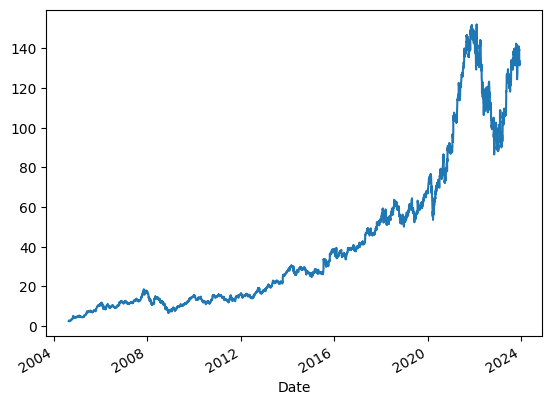

In [178]:
# viz a single col
df['High'].plot()

<Axes: xlabel='Date'>

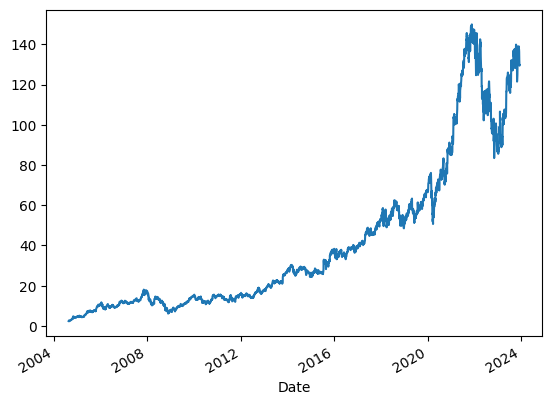

In [179]:
df['Low'].plot()

<Axes: xlabel='Date'>

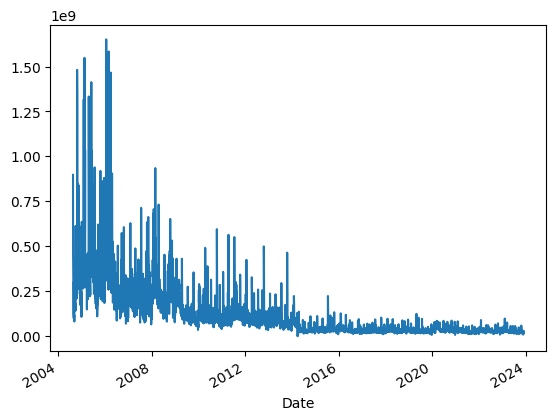

In [180]:
# viz a single col
df['Volume'].plot()

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4858 entries, 2004-08-19 to 2023-12-05
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        4858 non-null   float64
 1   High        4858 non-null   float64
 2   Low         4858 non-null   float64
 3   Close       4858 non-null   float64
 4   Adj Close   4858 non-null   float64
 5   Volume      4858 non-null   int64  
 6   month_name  4858 non-null   object 
 7   day_name    4858 non-null   object 
 8   quarter     4858 non-null   int32  
dtypes: float64(5), int32(1), int64(1), object(2)
memory usage: 489.6+ KB


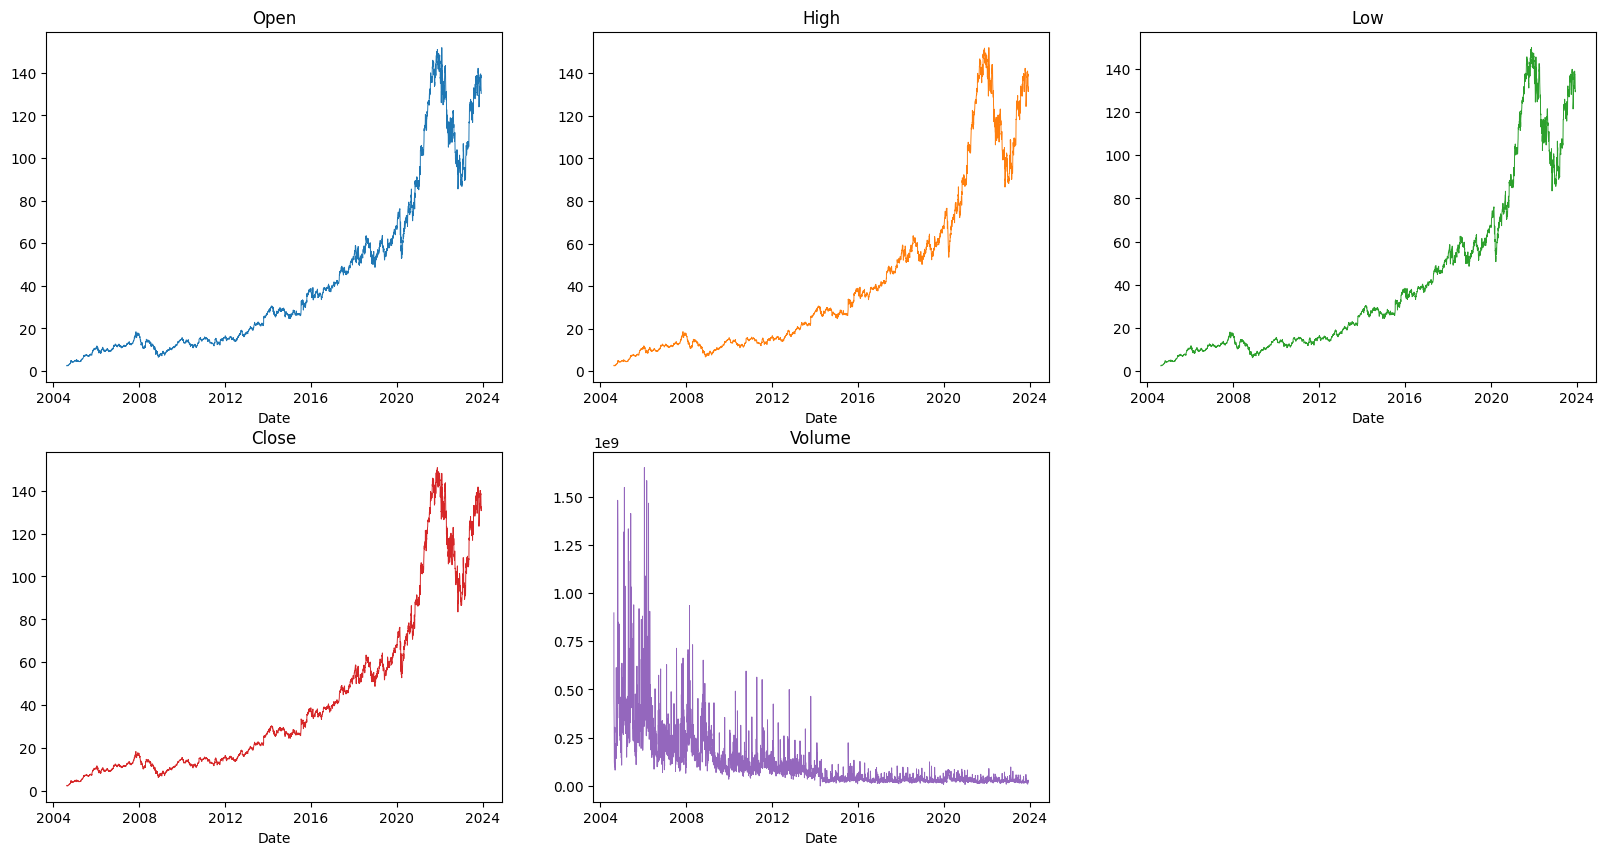

In [182]:
# viz all cols together
temp_df = df[['Open', 'High', 'Low', 'Close','Volume']]
ax = temp_df.plot(subplots=True,
                    layout=(2, 3),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,10),
                      title=['Open', 'High', 'Low', 'Close','Volume'])

<Axes: xlabel='Date'>

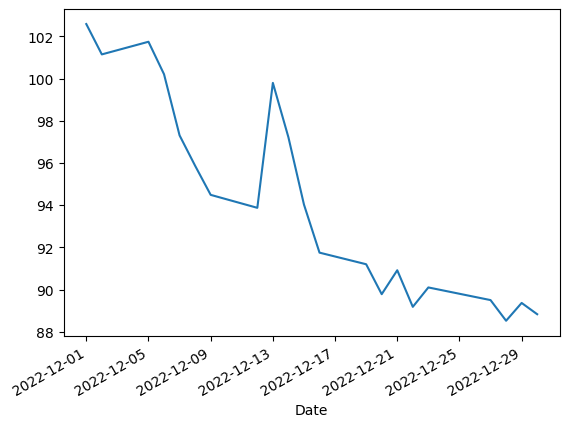

In [183]:
# plot for a particular year/month/week
df.loc['2022-12']['High'].plot()

<Axes: xlabel='month_name'>

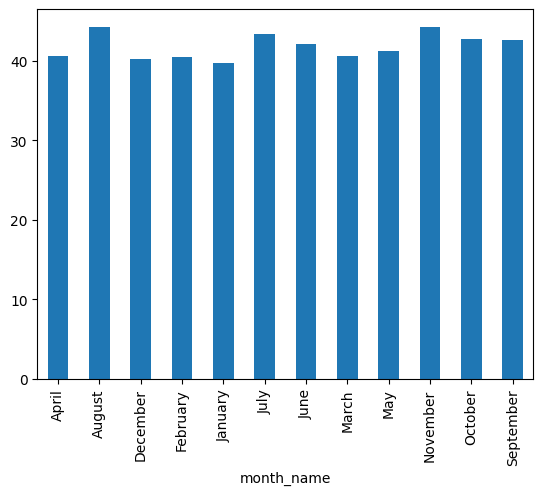

In [184]:
# monthly trend
df.groupby('month_name')['High'].mean().plot(kind='bar')

<Axes: xlabel='quarter'>

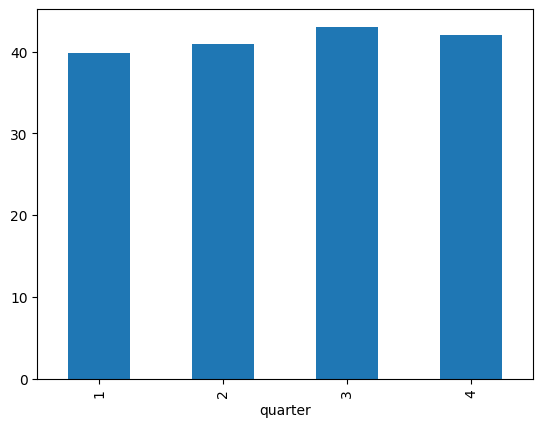

In [185]:
# quaterly trend
df.groupby('quarter')['Close'].mean().plot(kind='bar')

In [189]:
# frequency
df.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2023-11-21', '2023-11-22', '2023-11-24', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01',
               '2023-12-04', '2023-12-05'],
              dtype='datetime64[ns]', name='Date', length=4858, freq=None)

In [188]:
# asfreq
df.asfreq('6h',method='bfill')

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,August,Thursday,3
2004-08-19 06:00:00,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,August,Friday,3
2004-08-19 12:00:00,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,August,Friday,3
2004-08-19 18:00:00,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,August,Friday,3
2004-08-20 00:00:00,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2023-12-04 00:00:00,131.294006,131.449997,129.399994,130.630005,130.630005,24117100,December,Monday,4
2023-12-04 06:00:00,130.369995,133.539993,129.729996,132.389999,132.389999,19216500,December,Tuesday,4
2023-12-04 12:00:00,130.369995,133.539993,129.729996,132.389999,132.389999,19216500,December,Tuesday,4


##### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

<Axes: xlabel='Date'>

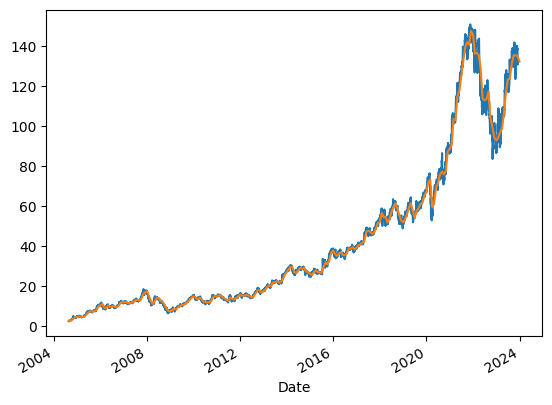

In [191]:
# Downsampling
df['Close'].plot()
df['Close'].resample('ME').mean().plot()

<Axes: xlabel='Date'>

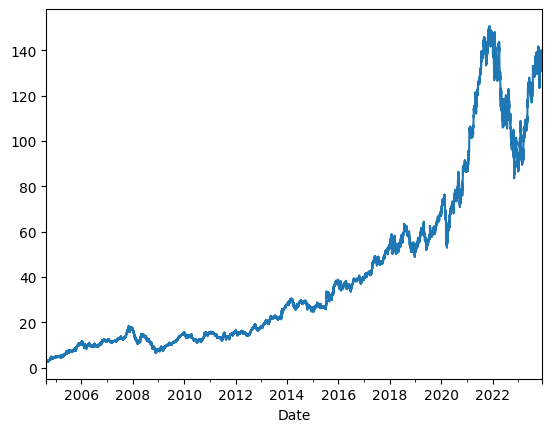

In [193]:
# Upsampling
df['Close'].resample('12h').interpolate(method='spline',order=2).plot()

##### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data. 

<Axes: title={'center': 'EWM'}, xlabel='Date'>

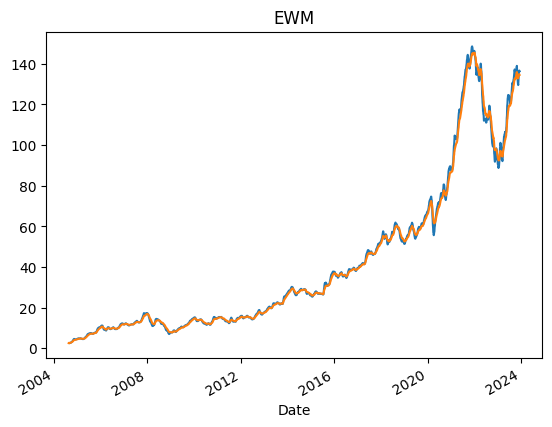

In [197]:
# Rolling window
df['Close'].rolling(15).mean().plot(title='Rolling')
df['Close'].ewm(20).mean().plot(title='EWM')

##### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [198]:
# shift example
df = pd.read_csv('login.csv',header=None)
df = df[[1,2]]
df.head()
df.rename(columns={1:'user_id',2:'login_time'},inplace=True)
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [201]:
user_df = df[df['user_id'] == 413]
user_df

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45
...,...,...
2958,413,2017-12-29 18:20:32
2963,413,2017-12-30 13:41:21
2974,413,2018-01-01 15:16:25
2982,413,2018-01-02 18:15:45


In [204]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, 11 to 2997
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     222 non-null    int64         
 1   login_time  222 non-null    datetime64[ns]
 2   shifted     221 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 6.9 KB


C:\Users\mahes\AppData\Local\Temp\ipykernel_25648\897488481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [205]:
user_df['shifted'] = user_df['login_time'].shift(1)
(user_df['login_time'] - user_df['shifted']).mean()

C:\Users\mahes\AppData\Local\Temp\ipykernel_25648\4028882259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


Timedelta('1 days 15:05:13.384615384')

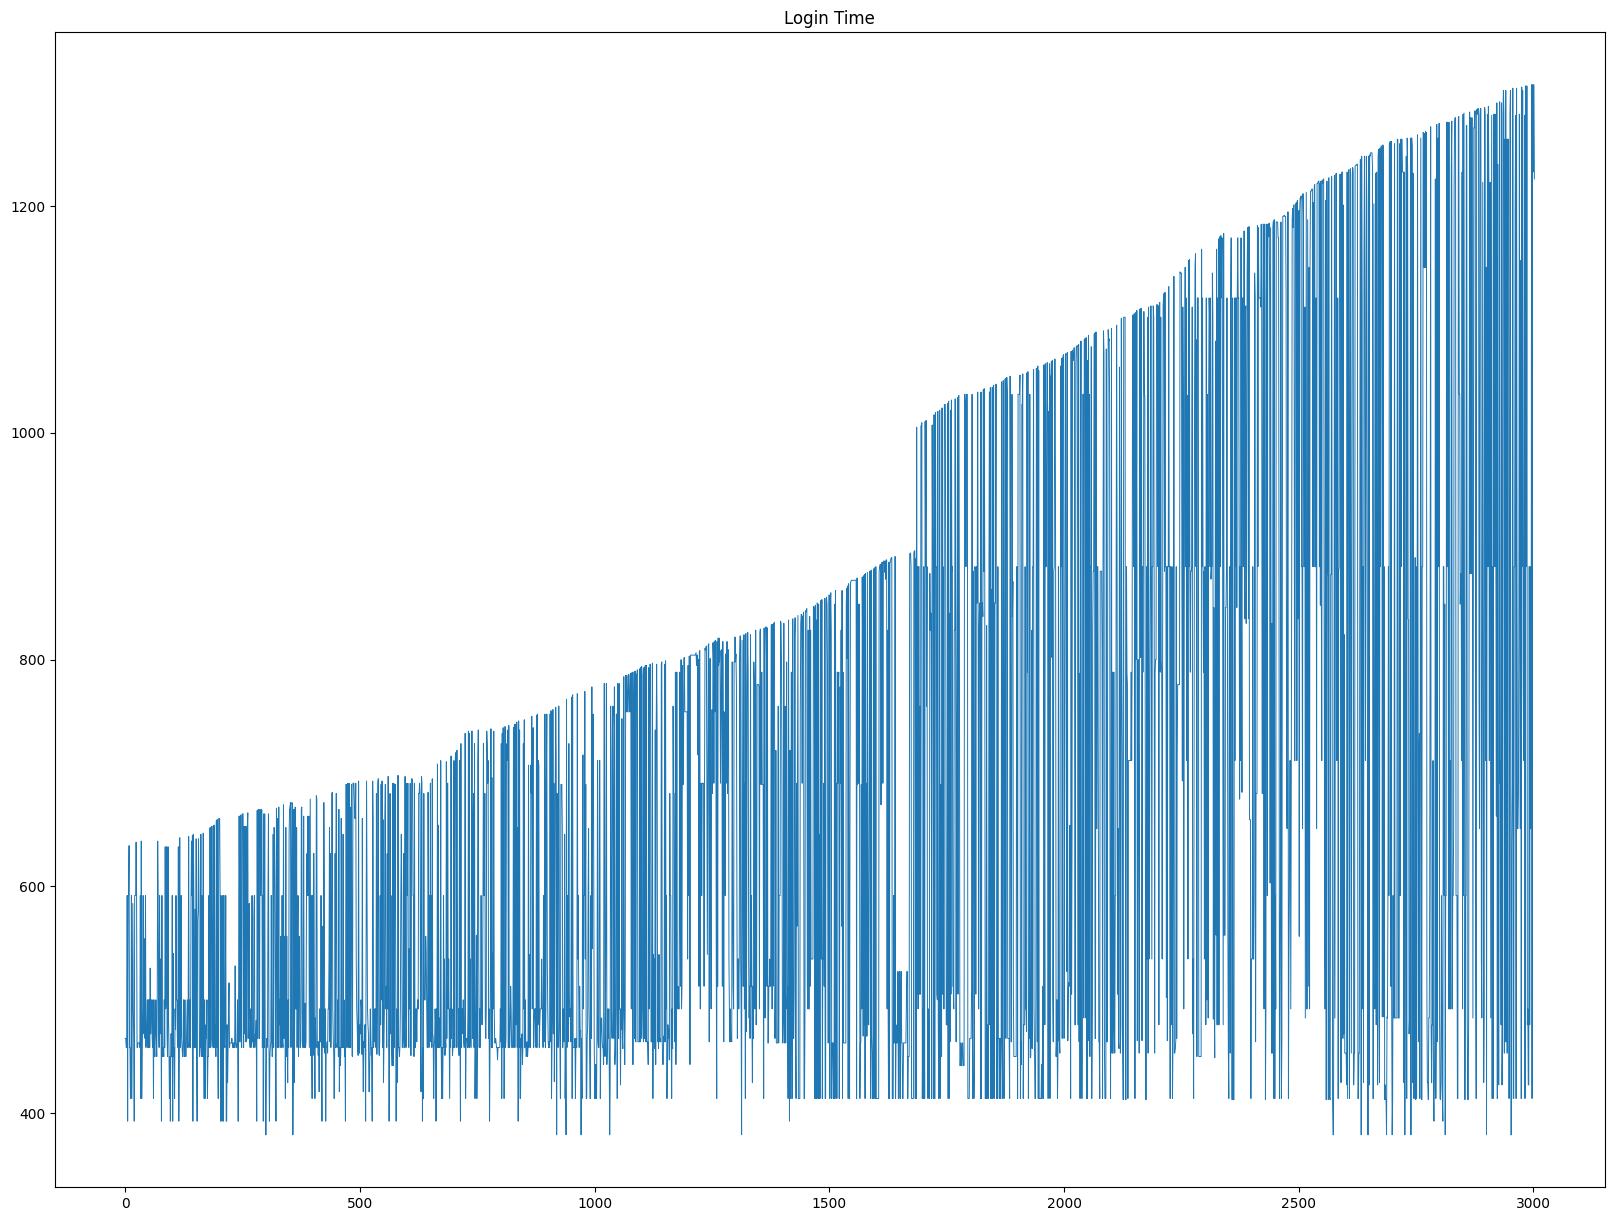

In [207]:
# Adjust the title list to match the number of columns in df
ax = df.plot(subplots=True,
                    layout=(1, 1),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20, 15),
                      title=['Login Time'])